In [1]:
import pandas as pd
import json
from utils import *

# with open('STREAM_A100.json', 'r') as f:
def get_cleaned_df(path):
  with open(path, "r") as f:
    data = json.load(f)
    df = pd.DataFrame(data["benchmarks"])
    return clean_raw_df(df)

In [2]:
__SHOW_PLOT = False
############################################################################
# NV A100
############################################################################
# df_dpcpp_a100 = get_cleaned_df("LOGS/A100/A100_DPCPP.json")
df_dpcpp_a100 = get_cleaned_df("LOGS/A100/a100_intel-llvm_50rep.json")
a100_dpcpp = create_dict_from_df(df_dpcpp_a100)
plot_values(a100_dpcpp, "A100 GPU DPCPP", do_show=__SHOW_PLOT)

# df_acpp_a100 = get_cleaned_df("LOGS/A100/A100_ACPP_FINAL.json")
df_acpp_a100 = get_cleaned_df("LOGS/A100/a100_acpp_50rep.json")
a100_acpp = create_dict_from_df(df_acpp_a100)
plot_values(a100_acpp, "A100 GPU ACPP 2", do_show=__SHOW_PLOT)

############################################################################
# AMD MI250
############################################################################

df_dpcpp_mi250 = get_cleaned_df("LOGS/MI250/mi250_intel-llvm_50rep.json")
mi250_dpcpp = create_dict_from_df(df_dpcpp_mi250)
plot_values(mi250_dpcpp, "MI250 GPU DPCPP", do_show=__SHOW_PLOT)

df_acpp_mi250 = get_cleaned_df("LOGS/MI250/mi250_acpp_50rep.json")
mi250_acpp = create_dict_from_df(df_acpp_mi250)
plot_values(mi250_acpp, "MI250 GPU ACPP", do_show=__SHOW_PLOT)


############################################################################
# AMD GENOA CPU
############################################################################
df_dpcpp_genoa = get_cleaned_df("LOGS/GENOA/genoa_intel-llvm_50rep_V2.json")
genoa_dpcpp = create_dict_from_df(df_dpcpp_genoa)
plot_values(genoa_dpcpp, "GENOA CPU DPCPP", do_show=__SHOW_PLOT)

# df_dpcpp_genoa = get_cleaned_df("LOGS/GENOA/genoa_100_dpcpp.json")
# genoa_dpcpp = create_dict_from_df(df_dpcpp_genoa)
# plot_values(genoa_dpcpp, "GENOA CPU DPCPP 100 repet", do_show=True)

# df_acpp_genoa = get_cleaned_df("LOGS/GENOA/genoa_acpp_50rep.json")
df_acpp_genoa = get_cleaned_df("LOGS/GENOA/genoa_100_acpp.json")
genoa_acpp = create_dict_from_df(df_acpp_genoa)
plot_values(genoa_acpp, "GENOA CPU ACPP", do_show=__SHOW_PLOT)

# df_acpp_genoa = get_cleaned_df("LOGS/GENOA/genoa_100_acpp.json")
# genoa_acpp = create_dict_from_df(df_acpp_genoa)
# plot_values(genoa_acpp, "GENOA CPU ACPP 100 repets", do_show=True)

############################################################################
# AMD EPYC CPU
############################################################################
# df_dpcpp_epyc = get_cleaned_df("LOGS/EPYC/epyc_dpcpp.json")
df_dpcpp_epyc = get_cleaned_df("LOGS/EPYC/epyc_intel-llvm_50rep.json")
epyc_dpcpp = create_dict_from_df(df_dpcpp_epyc)
plot_values(epyc_dpcpp, "EPYC CPU DPCPP", do_show=__SHOW_PLOT)

# df_acpp_epyc = get_cleaned_df("LOGS/EPYC/epyc_acpp.json")
df_acpp_epyc = get_cleaned_df("LOGS/EPYC/epyc_acpp_50rep.json")
epyc_acpp = create_dict_from_df(df_acpp_epyc)
plot_values(epyc_acpp, "EPYC CPU ACPP", do_show=__SHOW_PLOT)

############################################################################
# INTEL XEON CPU
############################################################################
# df_dpcpp_xeon = get_cleaned_df("LOGS/XEON/xeon_dpcpp.json")
df_dpcpp_xeon = get_cleaned_df("LOGS/XEON/xeon_intel-llvm_50rep.json")
xeon_dpcpp = create_dict_from_df(df_dpcpp_xeon)
plot_values(xeon_dpcpp, "XEON CPU DPCPP", do_show=__SHOW_PLOT)

# df_acpp_xeon = get_cleaned_df("LOGS/XEON/xeon_acpp.json")
df_acpp_xeon = get_cleaned_df("LOGS/XEON/xeon_acpp_50rep.json")
xeon_acpp = create_dict_from_df(df_acpp_xeon)
plot_values(xeon_acpp, "XEON CPU ACPP", do_show=__SHOW_PLOT)

############################################################################
# Intel PVC Machine
############################################################################
with open('LOGS/IntelPVC/IntelHW_MainBench.json', 'r') as f:
  data = json.load(f)
  df = pd.DataFrame(data["benchmarks"])

  cleaned_df = clean_raw_df(df)
  values_gpu = create_dict_from_df(cleaned_df[cleaned_df['gpu'] == 1])
  values_cpu = create_dict_from_df(cleaned_df[cleaned_df['gpu'] == 0])
  plot_values(values_cpu, "CPU Max DPCPP", log_base=2, do_show=__SHOW_PLOT)
  plot_values(values_gpu, "GPU PVC DPCPP", log_base=2, do_show=__SHOW_PLOT)



No error occured in Dataframe.
No error occured in Dataframe.
No error occured in Dataframe.
No error occured in Dataframe.


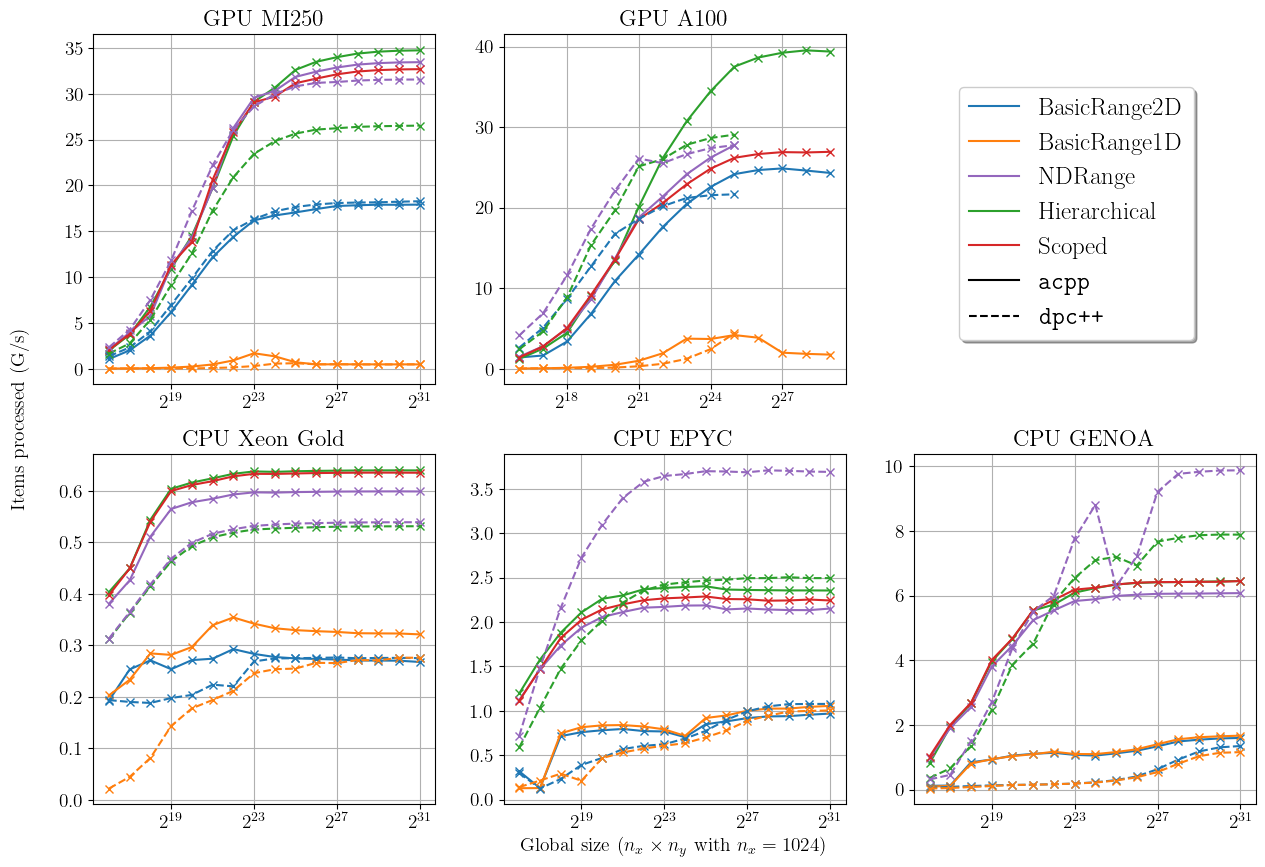

In [3]:
all_values=[
    #(val_acpp, val_dpcpp, title)
    (mi250_acpp, mi250_dpcpp, "GPU MI250"),
    (a100_acpp,  a100_dpcpp,  "GPU A100"),
    (xeon_acpp,  xeon_dpcpp,  "CPU Xeon Gold"),
    (epyc_acpp,  epyc_dpcpp,  "CPU EPYC"),
    (genoa_acpp, genoa_dpcpp, "CPU GENOA")
]

plot_all_general_perf(all_values)

# Perf Port Benchmark

In [4]:
from utils import __GPUS_ONLY, __CPUS_ONLY, __HW_LIST

dfs_dpcpp = [df_dpcpp_mi250, df_dpcpp_a100, df_dpcpp_epyc, df_dpcpp_genoa, df_dpcpp_xeon]
dfs_acpp  = [df_acpp_mi250 , df_acpp_a100 , df_acpp_epyc , df_acpp_genoa , df_acpp_xeon]

ny_sizes = [2**x for x in range(10, 22)]
best_runtimes_for_each_ny = []


for ny in ny_sizes:
    m_list_df_acpp = []
    m_list_df_dpcpp = []

    for ddf_acpp, ddf_dpcpp in zip(dfs_acpp, dfs_dpcpp):
        m_list_df_acpp.append(ddf_acpp.drop(ddf_acpp[(ddf_acpp["global_size"]/1024 != ny)].index) if ddf_acpp is not None else None)
        m_list_df_dpcpp.append(ddf_dpcpp.drop(ddf_dpcpp[(ddf_dpcpp["global_size"]/1024 != ny)].index) if ddf_dpcpp is not None else None)

    # best durations for each hardware regardless of the implem
    b_rts = {}
    for i_hw, hw_name in enumerate(__HW_LIST):
        if m_list_df_acpp[i_hw] is not None:
            # display(m_list_df_acpp)
            best_rt_acpp = m_list_df_acpp[i_hw]["real_time"].min()
        else:
            best_rt_acpp = -1
            
        if m_list_df_dpcpp[i_hw] is not None:
            # display(m_list_df_dpcpp)
            best_rt_dpcpp = m_list_df_dpcpp[i_hw]["real_time"].min()
        else:
            best_rt_dpcpp = -1

        b_rts[hw_name] = min([i for i in [best_rt_acpp, best_rt_dpcpp] if i != -1])

    best_runtimes_for_each_ny.append((ny, b_rts))

In [5]:
# from utils import __GPUS_ONLY, __CPUS_ONLY, __HW_LIST

# dfs_dpcpp = [df_dpcpp_mi250, df_dpcpp_a100, df_dpcpp_epyc, df_dpcpp_genoa, df_dpcpp_xeon]
# dfs_acpp  = [df_acpp_mi250 , df_acpp_a100 , df_acpp_epyc , df_acpp_genoa , df_acpp_xeon]

PP_SIZE = 2**14
index = [index for index, (key, value) in enumerate(best_runtimes_for_each_ny) if key == PP_SIZE]
_, best_r = best_runtimes_for_each_ny[index[0]]

# acpp_pp_values  = create_pp_values(dfs_acpp, PP_SIZE, best_r)
# dpcpp_pp_values = create_pp_values(dfs_dpcpp, PP_SIZE, best_r)

# pp_acpp , pp_acpp_cpu , pp_acpp_gpu  = {"arch":"", "app":""}, {"arch":"", "app":""}, {"arch":"", "app":""}
# pp_dpcpp, pp_dpcpp_cpu, pp_dpcpp_gpu = {"arch":"", "app":""}, {"arch":"", "app":""}, {"arch":"", "app":""}

# #all subset: cpus and gpus
# pp_acpp["arch"] , pp_acpp["app"]          = compute_pp(acpp_pp_values,  __HW_LIST, do_print=False)
# pp_dpcpp["arch"], pp_dpcpp["app"]         = compute_pp(dpcpp_pp_values, __HW_LIST, do_print=False)

# #only cpus
# pp_acpp_cpu["arch"] , pp_acpp_cpu["app"]  = compute_pp(acpp_pp_values,  __CPUS_ONLY, do_print=False)
# pp_dpcpp_cpu["arch"], pp_dpcpp_cpu["app"] = compute_pp(dpcpp_pp_values, __CPUS_ONLY, do_print=False)

# #only gpus
# pp_acpp_gpu["arch"] , pp_acpp_gpu["app"]  = compute_pp(acpp_pp_values,  __GPUS_ONLY, do_print=False)
# pp_dpcpp_gpu["arch"], pp_dpcpp_gpu["app"] = compute_pp(dpcpp_pp_values, __GPUS_ONLY, do_print=False)

In [6]:
# plot_perfport_full([("acpp", acpp_pp_values, pp_acpp_cpu, pp_acpp_gpu, pp_acpp),
                    # ("dpcpp", dpcpp_pp_values, pp_dpcpp_cpu, pp_dpcpp_gpu, pp_dpcpp)])

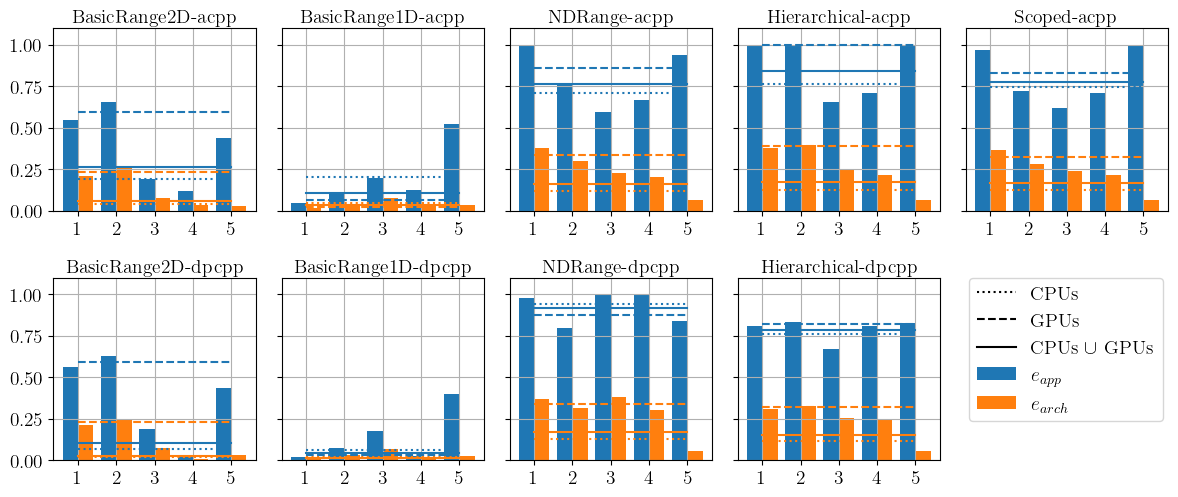

In [7]:
full_pp_values_acpp = []
full_pp_values_dpcpp = []

cpu_pp_values_acpp = []
cpu_pp_values_dpcpp = []

gpu_pp_values_acpp = []
gpu_pp_values_dpcpp = []

for pp_size, best_rts in best_runtimes_for_each_ny:
    acpp_pp_values  = create_pp_values(dfs_acpp, pp_size, best_rts)
    dpcpp_pp_values = create_pp_values(dfs_dpcpp, pp_size, best_rts)

    pp_acpp , pp_acpp_cpu , pp_acpp_gpu  = {"arch":"", "app":""}, {"arch":"", "app":""}, {"arch":"", "app":""}
    pp_dpcpp, pp_dpcpp_cpu, pp_dpcpp_gpu = {"arch":"", "app":""}, {"arch":"", "app":""}, {"arch":"", "app":""}

    #all subset: cpus and gpus
    pp_acpp["arch"] , pp_acpp["app"]          = compute_pp(acpp_pp_values,  __HW_LIST)
    pp_dpcpp["arch"], pp_dpcpp["app"]         = compute_pp(dpcpp_pp_values, __HW_LIST)

    #only cpus
    pp_acpp_cpu["arch"] , pp_acpp_cpu["app"]  = compute_pp(acpp_pp_values,  __CPUS_ONLY)
    pp_dpcpp_cpu["arch"], pp_dpcpp_cpu["app"] = compute_pp(dpcpp_pp_values, __CPUS_ONLY)

    #only gpus
    pp_acpp_gpu["arch"] , pp_acpp_gpu["app"]  = compute_pp(acpp_pp_values,  __GPUS_ONLY)
    pp_dpcpp_gpu["arch"], pp_dpcpp_gpu["app"] = compute_pp(dpcpp_pp_values, __GPUS_ONLY)
    
    if(pp_size == PP_SIZE):
        plot_perfport_full([("acpp", acpp_pp_values, pp_acpp_cpu, pp_acpp_gpu, pp_acpp),
                            ("dpcpp", dpcpp_pp_values, pp_dpcpp_cpu, pp_dpcpp_gpu, pp_dpcpp)])
    
    full_pp_values_acpp.append((pp_size, pp_acpp["app"]))
    full_pp_values_dpcpp.append((pp_size, pp_dpcpp["app"]))

    #TODO:
    cpu_pp_values_acpp.append((pp_size, pp_acpp_cpu["app"]))
    cpu_pp_values_dpcpp.append((pp_size, pp_dpcpp_cpu["app"]))

    #TODO:
    gpu_pp_values_acpp.append((pp_size, pp_acpp_gpu["app"]))
    gpu_pp_values_dpcpp.append((pp_size, pp_dpcpp_gpu["app"]))

In [37]:
def plot_pp_evolution(titles , full_pp_values_array):
    fig, ax = plt.subplots(1, 2, figsize=(13,5), sharex=True)
    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    
    for plot_idx, full_pp_values in enumerate(full_pp_values_array):
        values_to_plot_per_impl = {}
        
        # print(titles[plot_idx])

        nys_to_plot = []
        for ny, pp_dict in full_pp_values:
            nys_to_plot.append(ny)

            for impl, value in pp_dict.items():
                if not impl in values_to_plot_per_impl:
                    values_to_plot_per_impl[impl] = []

                values_to_plot_per_impl[impl].append(value)

        # fig, ax = plt.subplots()
        # pp.pprint(values_to_plot_per_impl)
        for impl, values in values_to_plot_per_impl.items():
            if(impl.startswith("Scoped") and titles[plot_idx].startswith('dpcpp')):continue
            current_color = next((c[1] for c in KCOLORS if c[0] == impl), "")
            
            ax[plot_idx].plot([nnyy*1024 for nnyy in nys_to_plot],
                              values,
                              'x-', color=current_color)
            # ax[plot_idx].title(f"Evloution of perf port app efficiency - {titles[plot_idx]}")
            ax[plot_idx].set_title(f"{titles[plot_idx]}")
    
    for impl, c in KCOLORS:
        ax[1].plot(0, -1, 'x-', color=c, label=impl)
    ax[1].plot(0, -1, color='r', ls='--', lw=1.5, label='$n_y = 2^{14}$')
    ax[1].legend()


    for a in ax :
        a.grid()
        a.set_ylim((-0.05,1))
        a.set_xscale('log', base=2), 
        # a.set_xlabel('Global size ($n_x \\times n_{y}$ with $n_x = 2^{10} = 1024 $)')
        a.set_ylabel('Performance-portability (app efficiency)')
        a.axvline(x=PP_SIZE*1024, color='r', ls='--', lw=1.5)
        a.set_xticks([aaa*1024 for aaa in [2**11, 2**13, 2**14, 2**15, 2**17, 2**19, 2**21]])
    
        a.get_xticklabels()[2].set_color('red') #Does not change the label
    
    plt.xlabel('Global size ($n_x \\times n_{y}$ with $n_x = 2^{10} = 1024 $)')
    plt.savefig(f'pp-evolution.pdf')
    # plt.show()

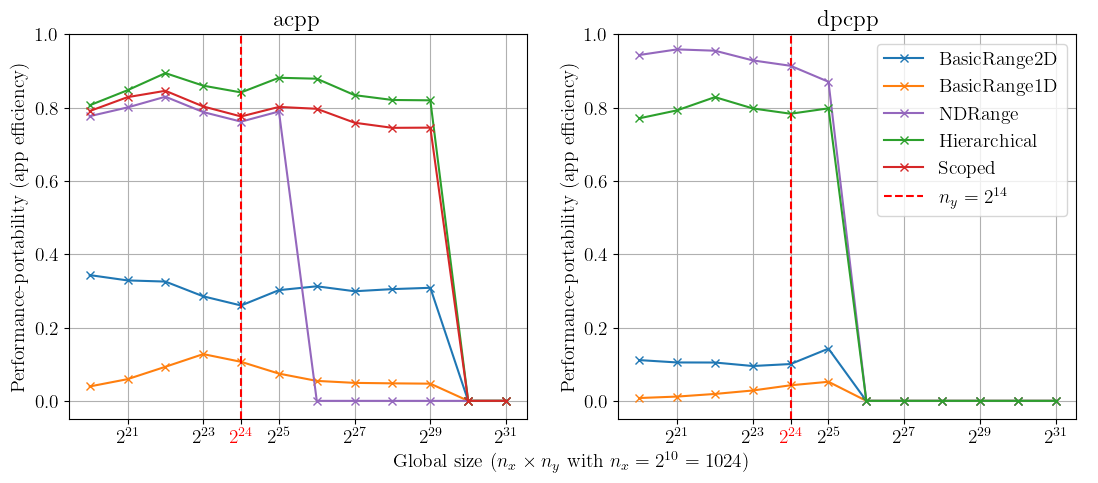

In [38]:
plot_pp_evolution(['acpp', 'dpcpp'],
                  [full_pp_values_acpp, full_pp_values_dpcpp],)

In [32]:
def plot_pp_evolution_with_all_H(titles , full_pp_values_array,
                                 cpu_pp_values_array,
                                 gpu_pp_values_array):

    fig, ax = plt.subplots(1, 2, figsize=(13,5))
    
    for plot_idx, (full_pp_values, cpu_pp_values, gpu_pp_values) in enumerate(zip(full_pp_values_array, cpu_pp_values_array, gpu_pp_values_array)):
        values_to_plot_per_impl = {}
        cpu_to_plot_per_impl = {}
        gpu_to_plot_per_impl = {}
        
        # print(titles[plot_idx])

        nys_to_plot = []
        for (ny, pp_dict), (_, cpu_pp_dict), (_, gpu_pp_dict) in zip(full_pp_values, cpu_pp_values, gpu_pp_values):
            nys_to_plot.append(ny)

            for (impl, value), (_, cpu_val), (_, gpu_val) in zip(pp_dict.items(), cpu_pp_dict.items(), gpu_pp_dict.items()):
                if not impl in values_to_plot_per_impl:
                    values_to_plot_per_impl[impl] = []
                    
                    cpu_to_plot_per_impl[impl] = []
                    gpu_to_plot_per_impl[impl] = []

                values_to_plot_per_impl[impl].append(value)
                
                cpu_to_plot_per_impl[impl].append(cpu_val)
                gpu_to_plot_per_impl[impl].append(gpu_val)

        # fig, ax = plt.subplots()
        # pp.pprint(values_to_plot_per_impl)
        for (impl, values), (_, cpu_values), (_, gpu_values) in zip(values_to_plot_per_impl.items(), cpu_to_plot_per_impl.items(), gpu_to_plot_per_impl.items()):
            if(impl.startswith("Scoped") and titles[plot_idx].startswith('dpcpp')):continue
            current_color = next((c[1] for c in KCOLORS if c[0] == impl), "")
            
            ax[plot_idx].plot([nnyy*1024 for nnyy in nys_to_plot],
                              values,
                              'x-', color=current_color)

            ax[plot_idx].plot([nnyy*1024 for nnyy in nys_to_plot],
                              cpu_values,
                              'x:', color=current_color)

            ax[plot_idx].plot([nnyy*1024 for nnyy in nys_to_plot],
                              gpu_values,
                              'x--', color=current_color)

            # ax[plot_idx].title(f"Evloution of perf port app efficiency - {titles[plot_idx]}")
            ax[plot_idx].set_title(f"Evolution of pp app efficiency {titles[plot_idx]}")
    
    for impl, c in KCOLORS:
        ax[1].plot(0, -1, 'x-', color=c, label=impl)
    ax[1].plot(0, -1, color='r', ls='--', lw=1.5, label='$n_y = 2^{14}$')
    ax[1].legend()


    for a in ax :
        a.grid()
        a.set_ylim((-0.05,1.05))
        a.set_xscale('log', base=2), 
        a.set_xlabel('Global size ($n_x \\times n_{y}$ with $n_x = 2^{10} = 1024 $)')
        a.set_ylabel('pp (app efficiency)')
        a.axvline(x=PP_SIZE*1024, color='r', ls='--', lw=1.5)
        a.set_xticks([aaa*1024 for aaa in [2**11, 2**13, 2**14, 2**15, 2**17, 2**19, 2**21]])
    
        a.get_xticklabels()[2].set_color('red') #Does not change the label
    
    plt.savefig(f'pp-evolution-all-H.pdf')
    # plt.show()

In [17]:
plot_pp_evolution_with_all_H(['acpp', 'dpcpp'],
                  [full_pp_values_acpp, full_pp_values_dpcpp],
                  [cpu_pp_values_acpp, cpu_pp_values_dpcpp],
                  [gpu_pp_values_acpp, gpu_pp_values_dpcpp])

TypeError: plot_pp_evolution() takes 2 positional arguments but 4 were given

# WG SIZE BENCHMARK

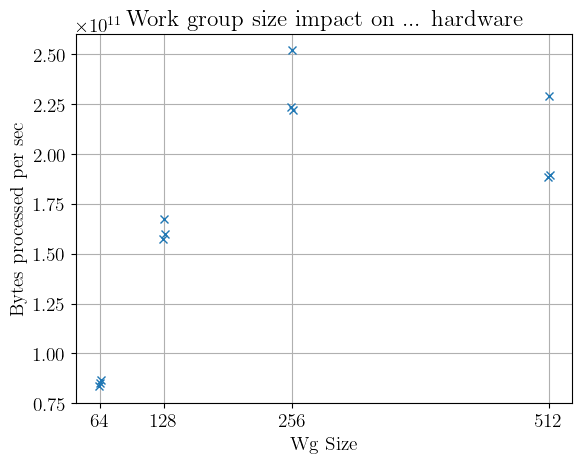

In [12]:
# with open("LOGS/A100/a100_acpp_with_wgsize.json", "r") as f:
# with open("LOGS/MI250/mi250_dpcpp.json", "r") as f:
with open("LOGS/IntelPVC/FULL_BENCH_SYCL_INTEL.json", "r") as f:
    data = json.load(f)
    df = pd.DataFrame(data["benchmarks"])
    df["kernel_id"] = df["kernel_id"].map(kernel_id)

    #Filter the right benchmarks
    df = df.drop(df[df["name"].str.startswith("BM_Ad")].index)
    # df = df.drop(df[df.error_occurred == True].index)

    #TODO: HERE ONLY ONE SIZE, COULD DRAW DIFFERENT SIZES WITH DIFFERENT COLORS
    df = df.drop(df[df["ny"] != 16384].index)
    
    df = df[df["gpu"] == 1]
    # df = df[df["gpu"] == 0]

    # fig, ax = plt.subplots()
    plt.plot(df.wg_size, df.bytes_per_second, 'x')
    # fig.canvas.callbacks.connect('pick_event', on_pick)

    plt.xlabel("Wg Size")
    plt.ylabel("Bytes processed per sec")
    plt.title("Work group size impact on ... hardware")
    plt.xticks([64, 128, 256, 512])

    plt.grid()

# SUBMISSION BENCHMARK

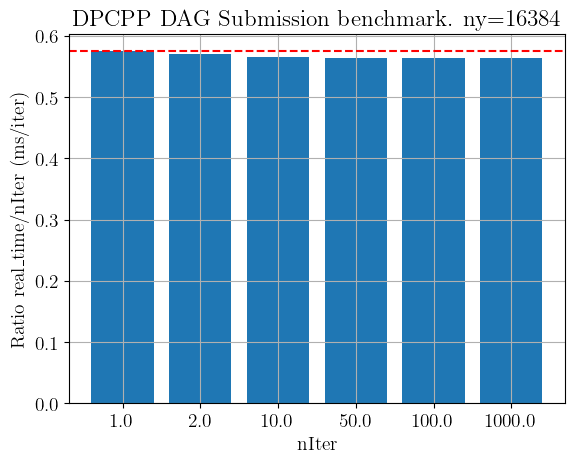

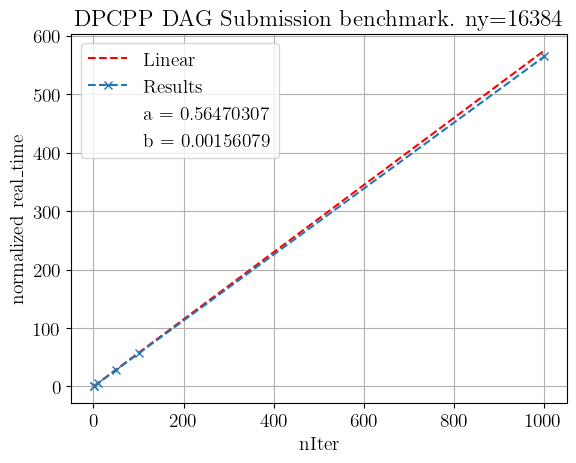

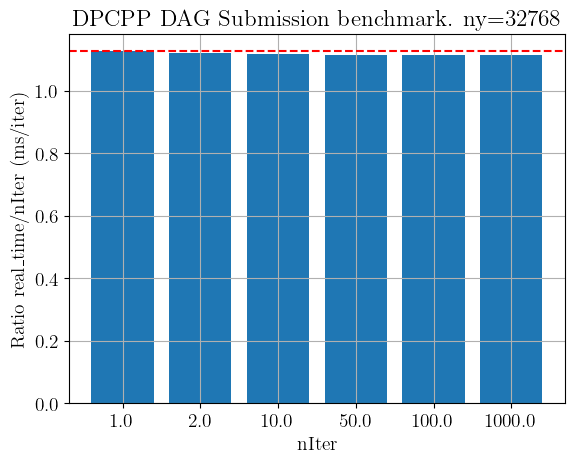

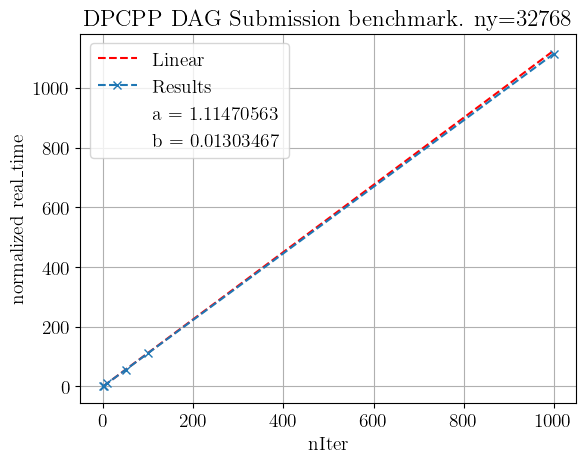

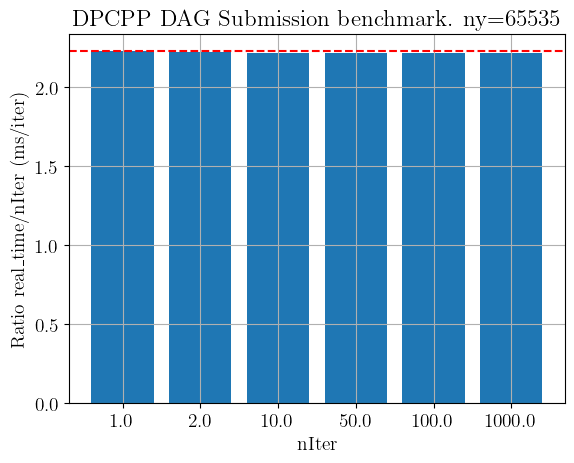

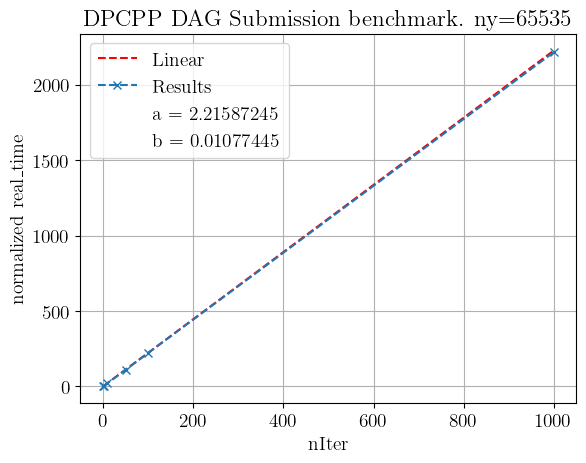

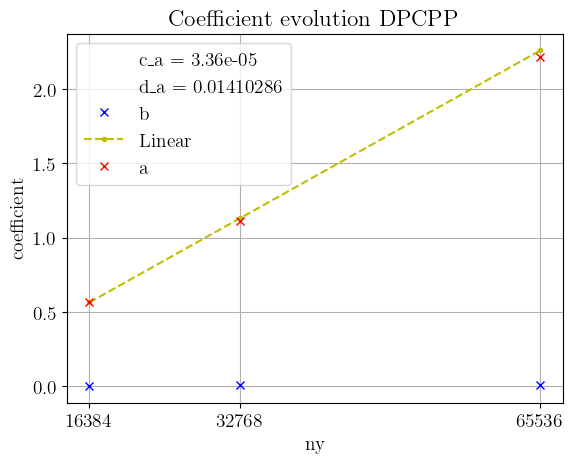

In [13]:
# ===========================================================
# FILTERS
# ===========================================================
# __NYs = [16384, 16384*2, 16384*2*2]
__KERNEL = "Hierarchical"
__MAX_NITER = 1000
# __NY = 16384*2*2

# __IMPLEM = "ACPP"

__IMPLEM = "DPCPP"

ABs = []

for __NY in [16384, 16384*2, 16384*2*2]:

    if __NY == 16384*2*2 and __IMPLEM.startswith('DPCPP') : __NY -= 1
    path = "LOGS/A100/A100_DPCPP_SUBMISSION.json" if __IMPLEM.endswith("DPCPP") else "LOGS/A100/a100_submission_acpp.json"
    with open(path, "r") as f:
        data = json.load(f)
        df = pd.DataFrame(data["benchmarks"])

        # df = df.drop(df[df.error_occurred == True].index)
        df["kernel_id"] = df["kernel_id"].map(kernel_id)

        # ===========================================================
        # FILTERS APPLICATION
        # ===========================================================
        df = df.drop(df[df["nIter"] > __MAX_NITER].index)
        df = df.drop(df[df["ny"] != __NY].index)
        df = df.drop(df[df["kernel_id"] != __KERNEL].index)
        # display(df)

        # ===========================================================
        # BAR CHART
        # ===========================================================
        plt.bar(df["nIter"].astype(str), df.real_time / df.nIter)

        first_niter = df[(df["nIter"] == 1) & (df["ny"] == __NY)]["nIter"]
        first_real_time = df[(df["nIter"] == 1) & (df["ny"] == __NY)]["real_time"]
        v = first_real_time.iloc[0] / first_niter.iloc[0]
        plt.axhline(y=v, color="r", linestyle="--")

        plt.title(f"{__IMPLEM} DAG Submission benchmark. ny={__NY}")
        plt.xlabel("nIter")
        plt.ylabel("Ratio real_time/nIter (ms/iter)")
        plt.grid()
        plt.show()

        # ===========================================================
        # PLOT
        # ===========================================================
        normalized_y = df.real_time
        # normalized_y = df.real_time/__NY*
        # normalized_y = normalized_y/normalized_y.max()
        # normalized_y = df.real_time/df["real_time"].max()
        # display(normalized_y)

        plt.plot(
            df.nIter,
            [x * normalized_y.iloc[0] for x in df["nIter"].to_list()],
            "r--",
            label="Linear",
        )
        plt.plot(df.nIter, normalized_y, "x--", label="Results")
        
        import numpy as np
        (a, b) = np.polyfit( df.nIter, normalized_y , 1)
        # plt.plot(df.nIter, [x * a+  b for x in df["nIter"].to_list()])
        ABs.append(((a,b), __NY))
        plt.plot(0,0, 'k.', alpha=0.001, label=f"a = {round(a, 8)}")
        plt.plot(0,0, 'k.', alpha=0.001, label=f"b = {round(b, 8)}")
        plt.legend()
        plt.title(f"{__IMPLEM} DAG Submission benchmark. ny={__NY}")
        plt.xlabel("nIter")
        plt.ylabel("normalized real_time")
        plt.grid()
        plt.show()

As  = [x[0][0] for x in ABs]
Bs  = [x[0][1] for x in ABs]
NYs = [x[1] for x in ABs]

(c, d) = np.polyfit(NYs, As , 1)
plt.plot(16384*2,0, 'k.', alpha=0.001, label=f"c_a = {round(c, 8)}")
plt.plot(16384*2,0, 'k.', alpha=0.001, label=f"d_a = {round(d, 8)}")

plt.plot(NYs, Bs, 'xb', label="b")
plt.plot(NYs, [As[0] * y for y in [1, 2, 4]], 'y.--',label="Linear")
plt.plot(NYs, As, 'xr', label="a")
plt.title(fr"Coefficient evolution {__IMPLEM}")
plt.xlabel("ny")
plt.ylabel("coefficient")
plt.xticks([16384*x for x in [1, 2, 4]])
plt.grid()
plt.legend()
plt.show()


# Time prediction

time = 104 + 14103.nIter + 33,6.ny.nIter
donc le 104 est négligeable dès nIter=1
time = nIter ( 33,6.ny + 14103)
tout ça en ns 
et l'overhead par tâche devient négligeable ( 2 ordres de grandeur) quand ny≥42000

- `c` c'est c'est le temps proportionel au calcul à effectuer
- `b` c'est un temps constant, mais qui en fait est nul
- donc reste `d`, un temps par tache qui dépend pas de la taille du problème, donc oui, a priori un overhead par tache

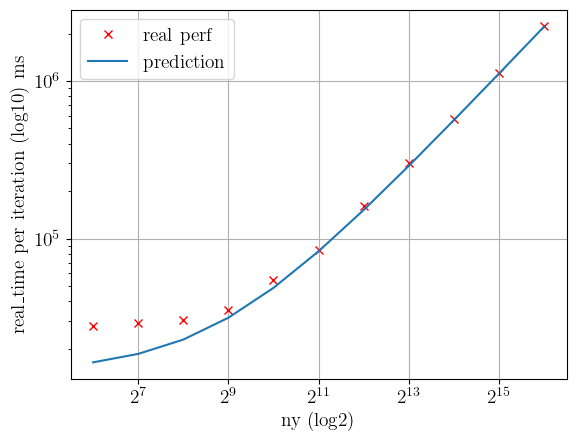

In [14]:
__KERNEL = "Hierarchical"

with open("LOGS/A100/A100_DPCPP.json", "r") as f:
# with open("LOGS/A100/A100_ACPP_FINAL.json", "r") as f:
  data = json.load(f)
  df = pd.DataFrame(data["benchmarks"])
  cleaned_df = clean_raw_df(df, perf_name="real_time", magnitude=1e-6)
  kernel_df = cleaned_df[cleaned_df["kernel"] == __KERNEL]

  ny_sizes = kernel_df["global_size"]/1024
  
  pred = [104+33.6*ny + 14103 for ny in ny_sizes]
  plt.plot(ny_sizes, kernel_df['perf_median'], 'xr',label="real perf")
  plt.plot(ny_sizes, pred, label="prediction")
  
  plt.yscale('log', base=10)
  plt.xscale('log', base=2)
  plt.ylabel("real_time per iteration (log10) ms")
  plt.xlabel("ny (log2)")
  plt.legend()
  plt.grid()
#   values = create_dict_from_df(cleaned_df)
#   plot_values(values, "A100 GPU DPCPP", do_show=True)

# STREAM BENCHMARK

In [15]:
def get_values(path):
  with open(path, "r") as f:
    data = json.load(f)
    df = pd.DataFrame(data["benchmarks"])
    return create_dict_from_df(clean_raw_df(df))

with open("STREAM/a100_xeon_STREAM_acpp.json", "r") as f:
    data = json.load(f)
    df = pd.DataFrame(data["benchmarks"])
    # df["kernel_id"] = df["kernel_id"].map(kernel_id)

    df = clean_raw_df(df)
    df_a100_acpp = df[df['gpu']==1]
    df_icelake_acpp = df[df['gpu']==0]

    # display(clean_raw_df(df_a100_acpp))
    plot_values(create_dict_from_df(df_a100_acpp), "STREAM BENCH A100 ACPP",show_peak=True)
    # plot_values(create_dict_from_df(df_icelake_acpp), "STREAM BENCH ICELAKE ACPP",show_peak=True)
    

# plot_values(get_values("STREAM/a100_STREAM_dpcpp.json"),"stream A100 DPCPP", show_peak=True)
plot_values(get_values("STREAM/xeon_STREAM_dpcpp.json"),"stream XEON (DPCPP)", show_peak=True)
# plot_values(get_values("STREAM/xeon_STREAM_acpp.json"),"stream XEON ACPP", show_peak=True)
plot_values(get_values("STREAM/genoa_STREAM_dpcpp.json"),"stream GENOA (DPCPP)", show_peak=True)
# plot_values(get_values("STREAM/genoa_STREAM_acpp.json"),"stream GENOA (ACPP)", show_peak=True)

plot_values(get_values("STREAM/mi250_STREAM_dpcpp.json"),"stream MI250 (DPCPP)", show_peak=True)
plot_values(get_values("STREAM/epyc_STREAM_dpcpp.json"),"stream EPYC (DPCPP)", show_peak=True)


No error occured in Dataframe.
No error occured in Dataframe.
No error occured in Dataframe.
No error occured in Dataframe.
No error occured in Dataframe.
